<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘checkmate’, ‘matrixStats’, ‘V8’





shape (NA -> 1.4.6) [CRAN]


Installing 1 packages: shape

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpgesgJd/remotes1b15a82b95f/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(rethinking)

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




# Chapter 5

## Easy

### 5E1
#### Question
Which of the linear models below are multiple linear regressions?
1.   $\mu_i = \alpha + \beta x_i$
2.   $\mu_i = \beta_x x_i + \beta_z z_i$
3.   $\mu_i = \alpha + \beta (x_i - z_i)$
4.   $\mu_i = \alpha + \beta_x x_i + \beta_z z_i$

#### Answer
In order to be a *multiple linear regression*, an equation needs to regress an outcome, e.g., $\mu$, onto two or more coefficient-predictor pairs, e.g., $\beta x$.

Looking at our equations, all four regress an outcome $\mu$ onto predictor variables, but only (2) and (4) regress $\mu$ onto two or more coefficient-predictor pairs ($\beta_x x_i$ and $\beta_z z_i$).  

The $\alpha$ terms do not count as coefficient-predictor pairs since they don't have a predictor variable (like $x$) associated with them--so (1) is out.  

In (3), there *are* two predictor variables ($x$ and $z$), but they are combined as a difference that can be rewritten as a single variable like $x_i - z_i = w_i$ such that the entire equation could be $\mu_i = \alpha + \beta w_i$.

### 5E2
#### Question
Write down a multiple regression to evaluate the claim: *Animal diversity is linearly related to latitude, but only after controlling for plant diversity.* You just need to write down the model definition.

#### Answer
First, we need an outcome.  Call it $A_i$ for *animal diversity*.  Maybe this is the number of species in a given area of land.

Since we're dealing with normal linear regression, which assumes that the outcome is normally distributed, we presume $A_i \sim Normal(\mu_i, \sigma)$.

Now we need to regress $A_i$ on *lattitude* $L_i$, and also controlling for *plant diversity* $P_i$.  This could look like $\beta_L L + \beta_P P$.

The question does not ask us to consider the possibility that $A$ is affected by $L$ differently for different values of $P$--e.g., perhaps animal diversity is less affected by lattitude at greater levels of plant diversity.  This type of relationship is described by an **interaction**, which is covered later.  But just for fun, I'll add this term $\beta_{LP}(L*P)$

Finally, we should consider including an intercept $\alpha$.  In this example, we can think of $\alpha$ as the value of $A_i$ when both lattitude is 0 (at the equator) and there are no plants in an area.

So altogether, our linear model could look like:

*   $A_i \sim Normal(\mu_i, \sigma)$
*   $\mu_i = \alpha + \beta_L L + \beta_P P + \beta_{LP}(L*P)$

We'd need some priors to make a fully-fledged Bayesian model, but we're ignoring that here.

Before ending this question, I can't help but point out an assumption in our model that seems possibly inappropriate.  That is this: $A_i$ may not be distributed as a normal distribution.  More correctly: after accounting for $L_i$ and $P_i$, the residual of $A_i$ may not be distributed as a normal distribution.  Why not?  Because a normal distribution permits negative values; a normally-distributed $A_i$ implies that less-than-zero animals may inhabit an area.

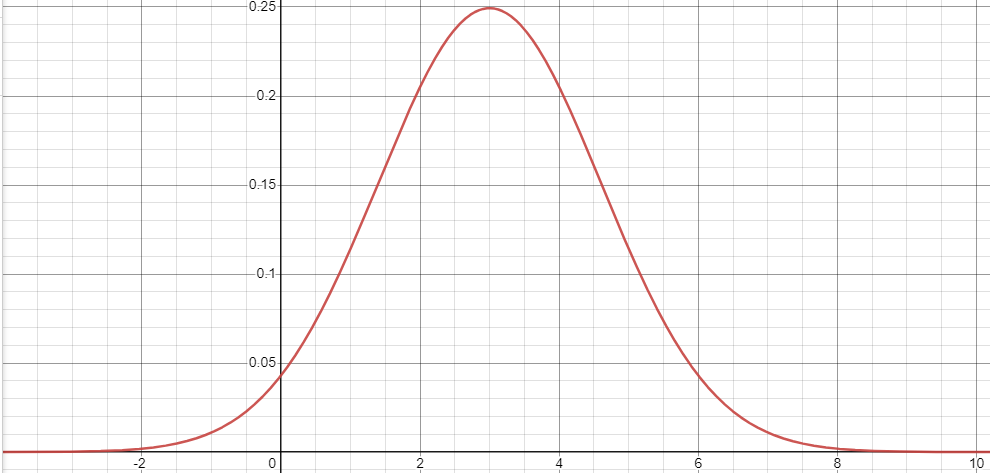

(Image made in desmos)

We could get around this by modeling $log(A_i) \sim Normal(\mu_i, \sigma)$ instead.  Alternatively, and preferrably, we might model $A$ as a non-normal distribution that cannot be negative.  We'll get to that later under the topic of **generalized linear models**.

### 5E3
#### Question
Write down a multiple regression to evaluate the claim: Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree. Write down the model definition and indicate which side of zero each slope parameter should be on.

#### Answer
##### Model Definition
Following the same approach in 5E2, let's first define our outcome.  Here, it is *time to PhD* $T$.  Again, we're working with normal linear regression, so we'll assume that $T \sim Normal(\mu_i, \sigma)$.  But also like 5E2, assuming a normal distribution may not be ideal since it permits negative time to PhD; we'll ignore that and charge ahead until we learn about generalized linear models.

We are regressing (the expected value of) $T$ on both *funding* $F$ and *size of lab* $S$: $\mu = \alpha + \beta_F F_i + \beta_S S_i$.  We might additionally consider an interaction $\beta_{FS} (F_i * S_i)$.

So our overall model, without priors, looks like:
*   $T \sim Normal(\mu_i, \sigma)$
*   $\mu_i = \alpha + \beta_F F_i + \beta_S S_i$

or
*   $T \sim Normal(\mu_i, \sigma)$
*   $\mu_i = \alpha + \beta_F F_i + \beta_S S_i + \beta_{FS} (F_i * S_i)$


##### $\beta$ values
Next, the question stipulates that *neither $F$ nor $S$ alone are good predictors of $T$, but that their combined relationship is positively associated with $T$*.  With that information, we are to determine which of $\beta_F$ and $\beta_S$ (and possibly $\beta_{FS})$ are positive values.

I think the wording here is a bit unclear.  Firstly, my intuitions are violated by the question.  The problem asserts that funding and lab size predict more time to complete a PhD...which makes thinking about the problem confusing.  So to make it simpler, I'm going to assume that $T$ actually represents something like *time less than 10 years to complete a PhD*, so that $F$ and $S$ increase the time saved (i.e., decrease total time to PhD).

Next, what does it mean for a predictor to be a *poor* predictor?  And what does it mean to consider the variables *together*?  I think that a poor predictor is a predictor, either $F$ or $S$, that has a $\beta$ coefficient (that is, the association between the predictor and the outcome) with crediibility intervals that semi-evenly straddle 0 **in a single-explanatory-variable regression** --$\mu_i = \alpha + \beta_F F_i$  or $\mu_i = \alpha + \beta_S S_i$.  These univariate regressions are what "considered alone" means; thus, "considered together" means combining them in a multivariate regression $\mu = \alpha + \beta_F F_i + \beta_S S_i$ (ignoring the interaction term for now).

In this case, it raises the question "How can neither $F$ nor $S$ have no association with $T$ in univariate regression, but both have positive associations in multivariate regression?".

The answer could be that $F$ and $S$ are negatively associated: if larger labs tended be less funded, or well-funded labs had less students.  This also violates my intuitions, so let's take $F$ to be *funding per student*.  Now a negative relationship between $F$ and $S$ makes sense; more students in a lab results in less funding per student.

Then, a univariate regression, say $\mu_i = \alpha + \beta_F F_i$, the unacknowledged variable, $S$ would be hiding in the data--labs with more funding would have fewer students, thus decreasing $T$ (possibly due to an impoverished learning environment) even though we didn't account for it in the regression.  Similarly for $\mu_i = \alpha + \beta_S S_i$, $F$ would hide in the data and covertly decrease $T$.  (This might be called the **missing-variable bias**)

Things get squirrelly if I allow an interaction term $\mu_i = \alpha + \beta_F F_i + \beta_S S_i + \beta_{FS} (F_i * S_i)$.  If I take "consider variables together" to refer to the interaction $\beta_{FS} (F_i * S_i)$, then $\beta_F$ and $\beta_S$ can be either positive or negative because only the interaction is the consideration of their combination.

### 5E4
#### Question
Suppose you have a single categorical predictor with 4 levels (unique values), labeled $A$, $B$, $C$,  and $D$. Let $A_i$ be an indicator variable that is 1 where case $i$ is in category $A$. Also suppose $B_i$, $C_i$,  and $D_i$ for the other categories. Now which of the following linear models are inferentially equivalent  ways to include the categorical variable in a regression? Models are inferentially equivalent when it’s  possible to compute one posterior distribution from the posterior distribution of another model.
1.   $\mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_D D_i$
2.   $\mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_C C_i + \beta_D D_i$
3.   $\mu_i = \alpha + \beta_B B_i + \beta_C C_i + \beta_D D_i$
4.   $\mu_i = \alpha_A A_i + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$
5.   $\mu_i = \alpha_A(1-B_i-C_i-D_i) + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$

#### Answer
It's important to keep in mind that $A$, $B$, $C$, and $D$ are different categories of the same thing--like color of shirts: red, yellow, blue, green.  Two tacit assumptions in this question are that the a) every datapoint is one of the 4 categories (there is no category $E$ or purple shirt, for instance) and b) no datapoint is more than 1 category (e.g., all shirts are solid colors--no stripes or polka dots).  In regression, it is common (though not necessary, as we'll see in later chapters) to *binarize* (if that's a word) categorical variables.  "Is the shirt red? yes=1, no=0.  Is the shirt yellow? yes=1, no=0.  etc."

Starting from regression (1).  Does this regression capture all 4 categories?  You might initially think not since $C$ is missing.  However, it *does* contain an intercept $\alpha$.  This intercept is the value when all other variables are 0.  So here, $\alpha$ represents the value of $\mu$ when all but $C$ are 0.

Is (2) the same as (1)?  Regression (2) contains terms for each category, plus an additional $\alpha$.  So while this data can model the 4 categories in our data, it is estimating an additional parameter.  Thus (1) and (2) are not equal.

Now to (3).  Is (3) equivalent to either (1) or (2).  Whereas regression (1) omitted $C$, regression (3) included $C$ but omits $A$; both (1) and (3) also contain an intercept $\alpha$; the only difference is that, whereas $\alpha$ represents $C$ in (1), $\alpha$ represents $A$ in (3).  By the same logic used for (1), (3) can handle all 4 categories.  (1) and (3) also have the same number of parameters.  We will get the same posterior values for (1) and (3), so (1) and (3) are equivalent.

Regression (4) contains all $\alpha$'s as coefficients.  Even though $\alpha$ is generally used as an intercept and and $\beta$ as a slope (coefficient for predictor-variable data), these are just labels.  So don't be put off by the change in symbolism.  We see that (4) has a term for each category, this time omitting an intercept.  Assuming that every datapoint will be either $A$, $B$, $C$, or $D$, (4) is equivalent to both (1) and (3).

Finally, regression (5) has terms for each category.  But the term for $A$ is weird: $\alpha_A(1-B_i-C_i-D_i)$.  But let's think it through.  This term is only non-zero when $B$, $C$, and $D$ are 0; in other words, when the datapoint category is $A$.  Again, we have terms for each category and the same number of parameters as (1), (3), and (4).

So all but (2) are equivalent.

## Medium

### 5M1 - 5M2
#### Questions
1.   Invent your own example of a spurious correlation. An outcome variable should be correlated with both predictor variables. But when both predictors are entered in the same model, the correlation between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).

2.   Invent your own example of a masked relationship. An outcome variable should be correlated with both predictor variables, but in opposite directions. And the two predictor variables should be correlated with one another.

#### Answers
I'm tackling 5M1 and 5M2 together since they describe similar phenomena with regression.  The overall lesson that spurious associations and masked relationship teach us is that, when we are concerned with inference (how certain variable affect an outcome), **we must be thoughtful about our regression**; we should not blindly include predictor variables into the regression because their relationships with one another can have erroneous effects on the results of the regression.  *Spurious associations* and *masked relations* are two examples of this.

Directed Acyclic Graphs (DAGs) are a tool we can use to think through our regressions, and hopefully avoid erroneous inference.  Besides Statistical Rethinking, a great book to learn more about DAGs is Judea Pearl's [Causal Inference in Statistics - A Primer](https://www.amazon.com/Causal-Inference-Statistics-Judea-Pearl/dp/1119186846/ref=sr_1_3?crid=2KWU5AD11OOY0&keywords=judea+pearl&qid=1707491168&sprefix=judea+pea%2Caps%2C438&sr=8-3)  We can build DAGs in R; we can also go to [dagitty.net](https://www.dagitty.net/) and build a DAG in our internet browswer.

Let's look at spurious correlations and masked relationships, starting with **spurious correlations**.

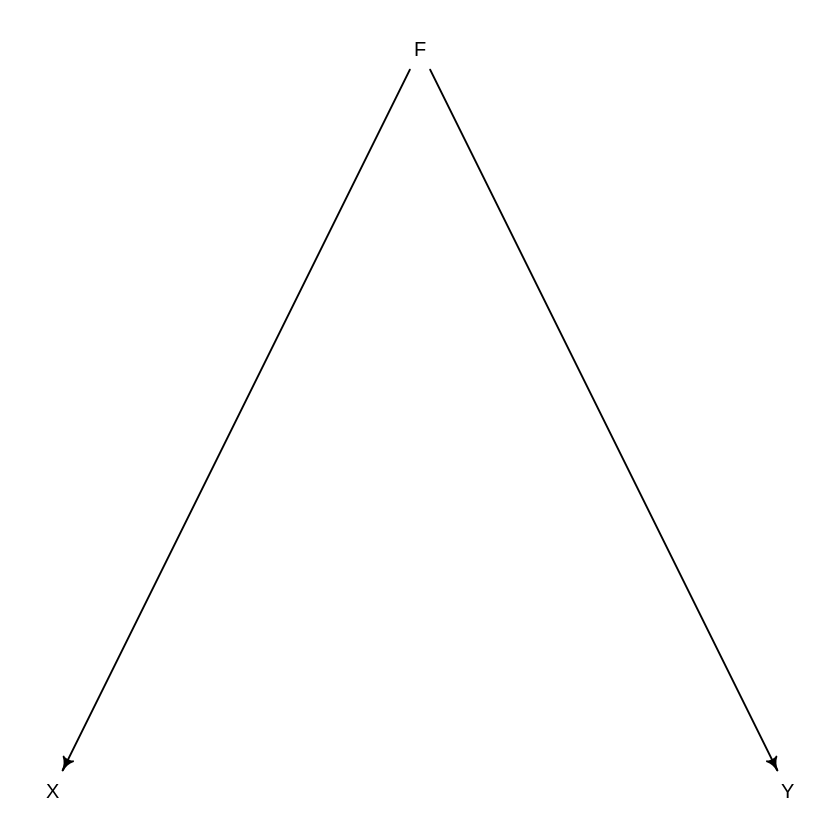

In [ ]:
library(dagitty)

# Spurious Correlation
SprCor_DAG <- dagitty("dag {F -> X; F -> Y}")
coordinates(SprCor_DAG) <- list(x=c(X=1, F=2, Y=3), y=c(X=2, F=1, Y=2))
drawdag(SprCor_DAG)

In a spurious correlation, both X and Y share a common cause F (for "fork").  If F is not included in the regression, then an association between X and Y will be revealed by our regression due to their common cause F even though X does not cause Y; without something like a DAG, we might falsely conclude that X affects Y.

Here, we might think of F as *how hot the temperature is*, X as *icecream sales*, and Y as *number of heat-related medical emergencies*.  Obviously, icecream sales do not cause heat-related medical emergencies--they are both a consequence of hot weather--but if we only include icecream sales and number of heat-related medical emergencies in a regression, then it could seem as though a causal relationship exists.

Let's test this by generating some data and running a model with that data.

In [ ]:
F <- rnorm(n=1000, mean=60, sd=15) # A vector of temperatures, with a mean of 60 deg (Farenheit) and standard deviation of 15
X <- 1*F + rnorm(1000) # X, icecream sales, is a function of temperature
Y <- 2*F + rnorm(1000) # Y, heat-related medical emergencies, also a function of temperature

SprCor_Reg <- lm(Y ~ X)
summary(SprCor_Reg)


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8242 -1.4683  0.0448  1.4495  7.1816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.433579   0.293189   1.479    0.139    
X           1.994405   0.004755 419.431   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.247 on 998 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9944 
F-statistic: 1.759e+05 on 1 and 998 DF,  p-value: < 2.2e-16


Here I'm useing the R's inbuilt `lm()` function to run the regression; I apologize for using a Frequentist model, but it's fine for our purposes here.

You see that the relationship between X and Y is highly significant, which could lead one to conclude that icecream sales increase heat-related medical emergencies. But we know this wrong because **we made the data**.

Now let's put temperature (F) into the regression; notice what happens to the estimates for X -> Y.

In [ ]:
SprCor_Reg_fixed <- lm(Y ~ X + F)
summary(SprCor_Reg_fixed)


Call:
lm(formula = Y ~ X + F)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2354 -0.6850 -0.0327  0.7057  3.3815 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.071984   0.134581  -0.535    0.593    
X            0.002726   0.032565   0.084    0.933    
F            1.998302   0.032600  61.298   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.03 on 997 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9988 
F-statistic: 4.209e+05 on 2 and 997 DF,  p-value: < 2.2e-16


Now the relationship between F and Y is strong while the relationship between X and Y is weak--as they should be.

Now let's tackle **masked relationships**.

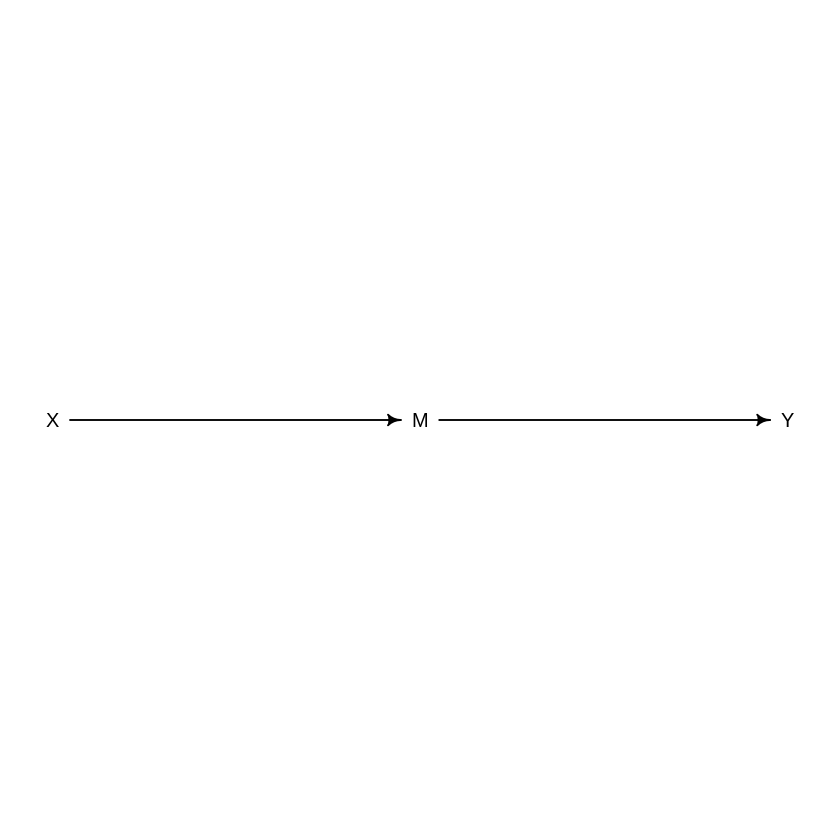

In [ ]:
library(dagitty)

# Masked Relationship
MskRel_DAG <- dagitty("dag {X -> M -> Y}")
coordinates(MskRel_DAG) <- list(x=c(X=1, M=2, Y=3), y=c(X=1, M=1, Y=1))
drawdag(MskRel_DAG)

In a masked relationship, X affects Y through M (for mediator)--X affects M, then M goes on to affect Y.  If M is included in the regression, the effect of X on Y is *masked*; without something like the DAG, we may conclude that X does not affect Y.  Excluding M from the regression, however, preserves the effect of X on Y.

Here, we might think of Y as a blood pressure, X as a drug to reduce blood pressure, and M as the mechanism by which the drug X prevents heart attack Y (let's say it reduces blood volume by increasing urination).  If our regression considtions on both drug and urinary output, the effect of drug on blood pressure will be masked since it works via urinary output.  Let's see this in some code.

In [ ]:
x <- rlnorm(1000) # dose of drug
m <- 120 - x*10 + rnorm(1000, mean=5, sd= 2) # urinary output as a function of drug dose
y <- m - rnorm(1000, mean=10, sd=5)

MskRel_Reg <- lm(y ~ x + m)
summary(MskRel_Reg)

MskRel_Reg_fixed <- lm(y ~ x)
summary(MskRel_Reg_fixed)


Call:
lm(formula = y ~ x + m)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7375  -3.0248  -0.0395   3.1548  19.3748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.74998    9.37721  -0.933    0.351    
x           -0.02849    0.75453  -0.038    0.970    
m            0.98931    0.07494  13.201   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.798 on 997 degrees of freedom
Multiple R-squared:  0.9526,	Adjusted R-squared:  0.9525 
F-statistic: 1.001e+04 on 2 and 997 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9617  -3.1273   0.0922   3.3179  21.3317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 115.01342    0.20467     562   <2e-16 ***
x            -9.94529    0.07648    -130   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.197 on 998 degrees of freedom
Multiple R-squared:  0.9443,	Adjusted R-squared:  0.9442 
F-statistic: 1.691e+04 on 1 and 998 DF,  p-value: < 2.2e-16


As promised, including M in the `MskRel_Reg` regression maskes the effect of the drug X on blood pressure Y.  Excluding M in the `MskRel_Reg_fixed` regression reveals the effect of drug on blood pressure.

For both the *fork* structure in the spurious relationship and the *mediator* structure in the masked relationship, conditioning on the "middle" variable between X and Y (F or M, respectively), by including it the regression, disassociates X and Y.  In the first case, forks and spurious relationships, this is what we want; but in the second case, mediators and masked relationships, we don't want this.

Thus, our decision to include a variable in the regression is contingent on knowledge/conjecture about the subject matter.

### 5M3
#### Question
It is sometimes observed that the best predictor of fire risk is the presence of firefighters—-States and localities with many firefighters also have more fires. Presumably firefighters do not cause fires. Nevertheless, this is not a spurious correlation. Instead fires cause firefighters. Consider the same reversal of causal inference in the context of the divorce and marriage data. How might a high divorce rate cause a higher marriage rate? Can you think of a way to evaluate this relationship, using  multiple regression?

#### Answer
I guess I need to decide on a definition of "rate".  It could be the number of events (marriages or divorces) in a given period of time, but I think it could be refer to the proportion of people currently married/divorced.  In the first case, as long as divorce didn't dissuade people from the idea of being remarried, divorce increases the pool of people that may get married--thus, increasing the number of marriages in a given period of time.  In the second case, divorce can still be a cause of marriage rate but I don't think divorce can cause marriage rate to increase since every divorce would be reducing the rate of marriage.

The second scenario is basically a tautology, and so doesn't require any further analysis; it is true by definition.  But the first scenario could bear analysis.  The first thought is to regress marriage rate on divorce rate like:
> $R_m = \beta_d R_d + \epsilon$

where $\epsilon$ represents other factors of marriage rate.  This assumes a causal relation like

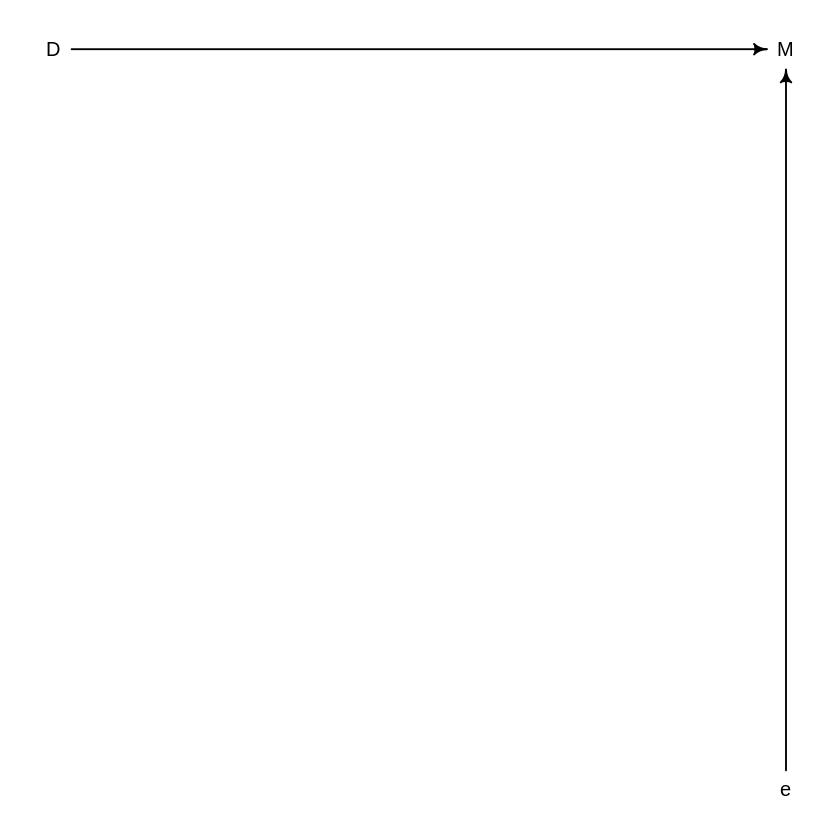

In [ ]:
library(dagitty)

Div_Mar_DAG <- dagitty("dag{D -> M <- e}")
coordinates(Div_Mar_DAG) <- list(x=c(D=1, M=2, e=2), y=c(D=1, M=1, e=2))
drawdag(Div_Mar_DAG)

If that is DAG is okay, then fine.  But it's probably more complicated than that.  For one marriage rate is probably a cause of divorce rate (by the same reasoning as divorce rate is a cause of marriage rate).  Now we have *cyclic* causation...and our DAG is no longer a DAG since it's not acyclic.

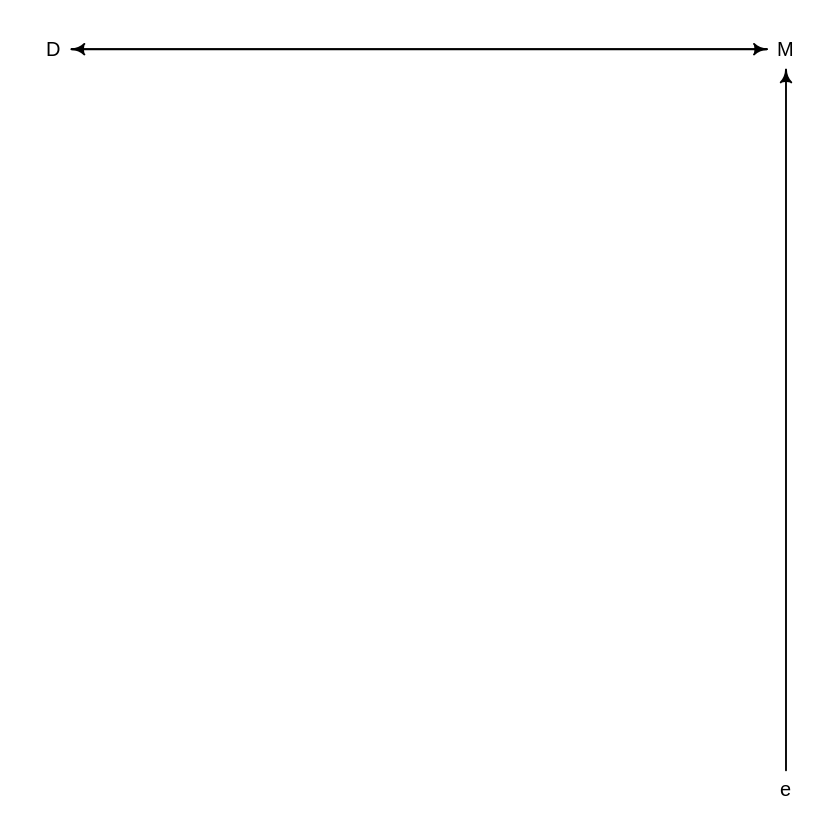

In [ ]:
library(dagitty)

Div_Mar_DAG2 <- dagitty("dag{D -> M <- e; M -> D}")
coordinates(Div_Mar_DAG2) <- list(x=c(D=1, M=2, e=2), y=c(D=1, M=1, e=2))
drawdag(Div_Mar_DAG2) # notice the arrow between D and M is two-headed.  It would be better to have two 1-headed arrows, but I'm not sure dagitty allows this.

For reasons we won't get into here, simple regression doesn't handle cyclic relations between an outcome and predictor (marriage and divorce, in this case).

(Here's two links to [part 1](https://youtu.be/yBipwlHXxJc?si=HCbnlzZj3vAXNvtg) and [part 2](https://youtu.be/1VWevzuw4TI?si=Y-7wQo4sPY1gx8oB) of Ben Lambert's discussion on reverse causation.  If you're interested in regression and Bayesian stats, you should check out his contents.  Along with Statistical Rethinking, Lambert's **[A Student's Guide to Bayesian Statistics](https://www.amazon.com/Students-Guide-Bayesian-Statistics/dp/1473916364/ref=sr_1_1?crid=2HS0PSRNZ2W3Q&keywords=Ben+Lambert&qid=1707664619&sprefix=ben+lam%2Caps%2C449&sr=8-1)** are the best books I've encountered for learning Bayesian stats.)

Instead, we would need to institute something like a *time-series* analysis, where marriage and divorce would be assessed at discrete timepoints.

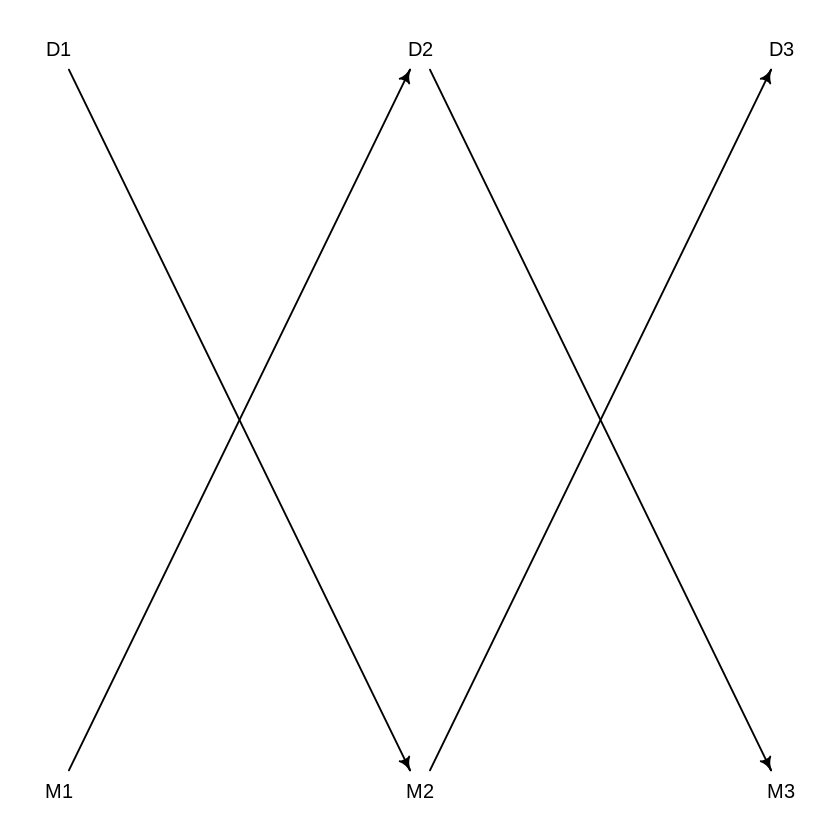

In [ ]:
library(dagitty)

Div_Mar_TimeSeries_DAG <- dagitty("dag{D1 -> M2;
                                       M1 -> D2;
                                       D2 -> M3;
                                       M2 -> D3}")
coordinates(Div_Mar_TimeSeries_DAG) <- list(x=c(D1=1, D2=2, D3=3,
                                                M1=1, M2=2, M3=3),
                                            y=c(D1=1, D2=1, D3=1,
                                                M1=2, M2=2, M3=2))
drawdag(Div_Mar_TimeSeries_DAG) # I'm ignoring the epsilon terms for clarity

### 5M4
#### Question
In the divorce data, States with high numbers of members of the Church of Jesus Christ of Latter-day Saints (LDS) have much lower divorce rates than the regression models expected. Find a list of LDS population by State and use those numbers as a predictor variable, predicting divorce rate using marriage rate, median age at marriage, and percent LDS population (possibly standardized). You may want to consider transformations of the raw percent LDS variable.

#### Answer
First, we need to find some data.  I scrubbed mine from [here](https://www.worldatlas.com/articles/mormon-population-by-state.html).  If you do this for yourself, note that Nevada is missing from the `WaffleDivorce` dataset.

In [ ]:
data(WaffleDivorce)
d <- WaffleDivorce
d$LDS_perc <- c(0.77, 4.56, 6.10, 1.03, 1.97, 2.74, 0.44, 0.57, 0.40, 0.75, 0.82, 5.17, 26.42, 0.45, 0.67, 0.90, 1.29, 0.79, 0.64, 0.82, 0.72, 0.40, 0.45, 0.59, 0.73, 1.16, 4.81, 1.30, 0.65, 0.37, 3.35, 0.41, 0.84, 1.49, 0.53, 1.21, 3.76, 0.40, 0.39, 0.81, 1.21, 0.75, 1.25, 67.70, 0.73, 1.13, 3.94, 0.93, 0.46, 11.53)

The question suggests standardizing the variables we'll use, so who am I to disagree?  I'm also going to put these into a different `data.frame()`.

In [ ]:
d2 <- data.frame(DivRate = standardize(d$Divorce),
                 MarRate = standardize(d$Marriage),
                 Age = standardize(d$MedianAgeMarriage),
                 LDS = standardize(d$LDS_perc))

Now let's build a model.

In [ ]:
m <- quap(
  alist(
    DivRate ~ dnorm(mu, sigma),
      mu <- a + b_M*MarRate + b_A*Age + b_L*LDS,
        a ~ dnorm(0, 0.2),
        b_M ~ dnorm(0, 0.5),
        b_A ~ dnorm(0, 0.5),
        b_L ~ dnorm(0, 0.5),
      sigma ~ dexp(1)
  ), data=d2
)

round(precis(m),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.00,0.09,-0.15,0.15
b_M,0.04,0.15,-0.20,0.27
b_A,-0.69,0.14,-0.92,-0.46
b_L,-0.31,0.12,-0.51,-0.12
sigma,0.73,0.07,0.62,0.85


It looks like, as hypothesized, LDS is negativelya associated with a state's divorce rate.  

### 5M5
#### Question
One way to reason through multiple causation hypotheses is to imagine detailed mechanisms through which predictor variables may influence outcomes. For example, it is sometimes argued that the price of gasoline (predictor variable) is positively associated with lower obesity rates (outcome variable). However, there are at least two important mechanisms by which the price of gas could  reduce obesity. First, it could lead to less driving and therefore more exercise. Second, it could lead to less driving, which leads to less eating out, which leads to less consumption of huge restaurant meals.  Can you outline one or more multiple regressions that address these two mechanisms? Assume you  can have any predictor data you need.

#### Answer
This question is pretty open-ended.  I'm not sure what it means to "outline" some regressions, but I'll give it a go.

First things first.  The question emphasizes that regression can be used/thought of as describing a causal network.  This is what DAGs are great for.  So let's create a DAG detailing the mechanisms in the question.

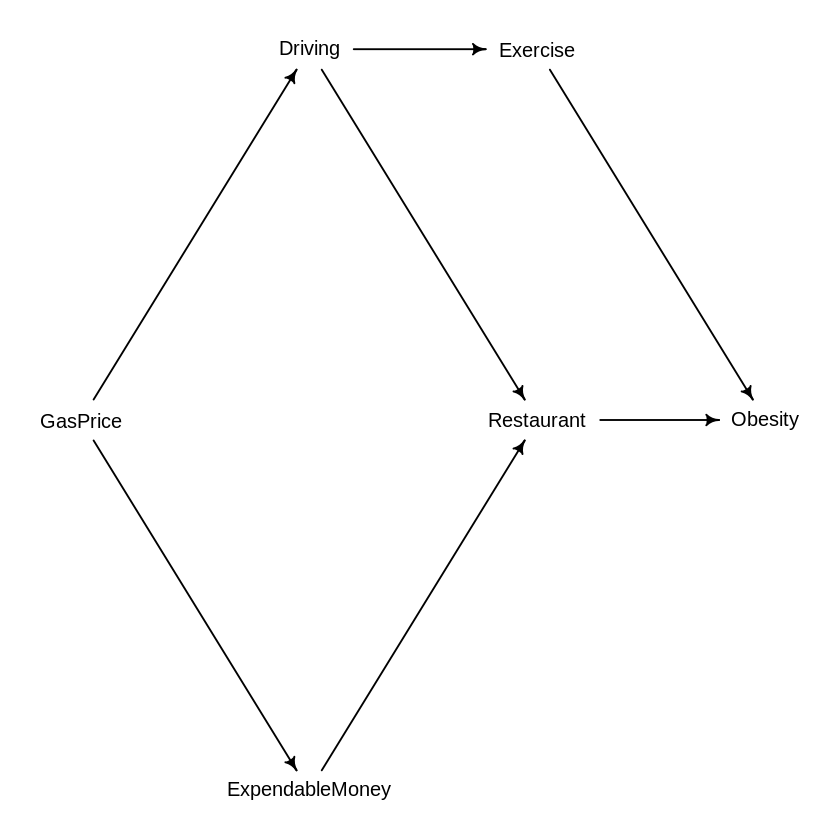

In [ ]:
library(dagitty)

Gas_Obesity_DAG <- dagitty("dag{GasPrice -> Driving -> Exercise -> Obesity;
                                GasPrice -> Driving -> Restaurant -> Obesity;
                                GasPrice -> ExpendableMoney -> Restaurant}")
coordinates(Gas_Obesity_DAG) <- list(x=c(GasPrice=1, Driving=2, ExpendableMoney=2, Exercise=3, Restaurant=3, Obesity=4),
                                     y=c(GasPrice=0, Driving=-1, ExpendableMoney=1, Exercise=-1, Restaurant=0, Obesity=0))
drawdag(Gas_Obesity_DAG)

The DAG implies several possible regressions; which regressions we use depends on which questions we're interested in.  For example, if the question of interest is "How do gas prices affect obesity?", then an appropriate regression may be as simple as

$Obesity = \alpha + \beta_{gas} GasPrice$

If we added any of the mediators ($Driving$, $ExpendableMoney$, $Restaurant$, $Exercise$), we would be blocking the causal path from $GasPrice$ to $Obesity$.

But if we were interested in the mediation of $Driving$ on the effect of $GasPrice$ on $Obesity$, we might add an additional regression like

$Obesity = \alpha + \beta_{gas} GasPrice + \beta_{drive} Driving$

Now, $\beta_{gas}$ represents the effect of $GasPrice$ on $Obesity$ *after controlling for* $Driving$.  Since we hypothesize that the effect of $GasPrice$ on $Obesity$ is partially mediated by $Driving$, the portion of the effect of $GasPrice$ on $Obesity$ mediated by $Driving$ would be estimated by the difference between the $\beta_{gas}$ estimates from the two regressions.

We could keep going, posing different questions and devising appropriate sets of regressions.  But I think you see the idea and this topic will be covered in more depth as the book goes on.

### 5H1
#### Questions
In the divorce example, suppose the DAG is: M → A → D. What are the implied conditional independencies of the graph? Are the data consistent with it?

#### Answers
Let's start by loading the `dagitty` package and building the DAG in R.

In [ ]:
library(dagitty)

Div_DAG <- dagitty("dag{M -> A -> D}")
coordinates(Div_DAG) <- list(x=c(M=1, A=2, D=3),
                             y=c(M=1, A=1, D=1))
drawdag(Div_DAG)

Let's first think our way through the question, then we'll check it with some functions of the `dagitty` package.

We are asked to find the conditional independencies of `Div_DAG`.  Technically, two variables, $X$ and $Y$, are independent $X \perp Y$ if their joint probability equals the product of their individual probabilities, $P(X \cap Y) = P(X) \cdot P(Y)$.  In other words, two variables are independent if knowing about one does not affect your estimation of the other.  It might also help to think about it as "$X$ and $Y$ don't share any information.

Two variables are *conditionally independent* is they become independent after conditioning on a third variable $Z$.  When we say "condition on", we mean "also consider".  So to say that "$X$ and $Y$ are conditionally independent given $Z$", we mean that our estimation of $X$ (or $Y$) is not affected by our estimation of $Y$ (or $X$) as long as we know $Z$.  More technically, $X$ and $Y$, are conditionally independent given $Z$, $X \perp Y | Z$, if the joint conditional probability of $X$ and $Y$ equals the product of their individual conditional probabilities, $P(X \cap Y |Z) = P(X|Z) \cdot P(Y|Z)$.

(Here's a [link](https://www.probabilitycourse.com/chapter1/1_4_4_conditional_independence.php) to a section on conditional independence in an excellent online book on probability called "Introduction to Probability, Statistics and Random Processes" by H. Pishro-Nik.)

In DAGs, arrows represents paths of information flow.  "Pipe/mediator" structures, like our `Div_DAG`, share information between two variables via a third variable.  In `Div_DAG`, $M$ and $D$ share information through $A$.  Conditioning on $A$, the *mediator*, stops this flow of information.  Thus, according to the DAG, $M$ and $D$ are conditionally independent given $A$, $M \perp D | A$.

We can check this in R.

In [ ]:
impliedConditionalIndependencies(Div_DAG)

We asked the `dagitty` package to find the `impliedConditionalIndependencies()` of `Div_DAG`.  It told us `D _||_ M | A`, which means $M$ and $D$ are conditionally independent given $A$, $M \perp D | A$, just as we determined.

A useful thing about (implied) conditional independcies is that they represent features of our model if our our model is an accurate representation of whatever we're trying to model; if our data does not demonstrate the implied conditional independcies of the DAG, then our model should be revised.  

> (NOTE: this is a bit trickier to pull off in practice.  
*   Firstly, just because the implied conditional independencies of a DAG are present in the data, it does not mean that that DAG is necessarily *correct*.  This is because other DAGs/models may fit the data equally well--even models that we can exclude based on subject-matter knowledge.  
*   Second, tests on your data will not typically give a clear-cut answer regarding conditional independence.  You generally get estimations of association that encompass a range of values.  For instance, the $\beta$ coefficients are a estimates between a predictor variable $X$ and the outcome variable $Y$.  Technically, $\beta=0$ is the value that mean "no association"; but your estimates of $\beta$ will cover a range of values that may include 0.  If the estimate of $\beta$ puts a lot of weight around zero, or the posterior of $\beta$ is heavily centered on 0, these are good indicators of independence.  But the answer will not be binary; as always, you must make judgement called based on subject-matter knowledge, and communicate your decisions to others.)

Now we must determine if our DAG seems to represent our data well.  Or at least, are $M$ and $D$ conditionally independent given $A$.  To find out, let's run models `m5.2` and `m5.3` from the chapter.

In [ ]:
data(WaffleDivorce)
d <- WaffleDivorce
d$D <- standardize(d$Divorce)
d$M <- standardize(d$Marriage)
d$A <- standardize(d$MedianAgeMarriage)

m5.2 <- quap(
  alist(
    D ~ dnorm(mu, sigma),
      mu <- a + bM * M,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
    sigma ~ dexp( 1)
  ), data = d
)
round(precis(m5.2), 2)

m5.3 <- quap(
  alist(
    D ~ dnorm( mu, sigma),
      mu <- a + bM*M + bA*A,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
        bA ~ dnorm( 0, 0.5),
      sigma ~ dexp( 1)
  ), data = d
)
round(precis( m5.3), 2)

In `m5.2`, where $A$ is not conditioned on, the $\beta$ coefficient for $M$, `b_M`, is not 0 and the 89% credibilty interval is safely above 0.  There seems to be a real association between $M$ and $D$ here.

Once we condition on $A$ in `m5.3`, the value for `b_M` drops towards 0 and the credibilty intervals spreads somewhat evenly around 0.  This looks like decent evidence that our DAG is consistent with the data.